# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

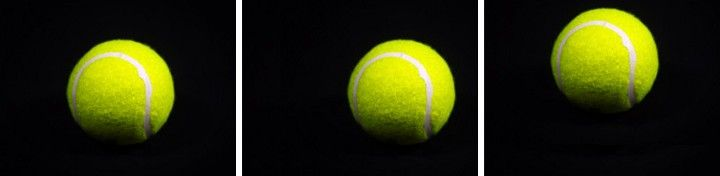



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [2]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

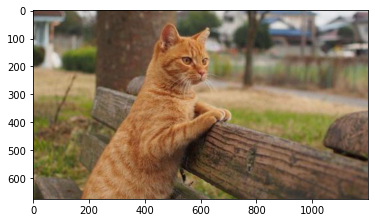

In [3]:
url = 'http://static.t13.cl/images/sizes/1200x675/1501017929-gato.jpg'

filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


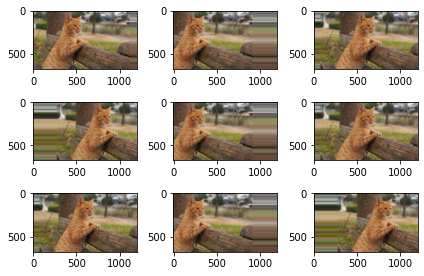

In [4]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-270,70])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means reversing rows or columns of pixels in the case of a vertical or horizontal rotation, respectively. The augmentation is specified by a Boolean argument **horizontal_flip** o **vertical_flip** for the class **ImageDataGenerator**.

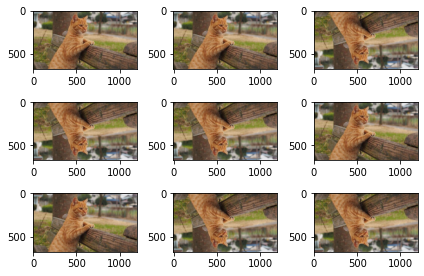

In [5]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The zoom amount is sampled evenly randomly from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

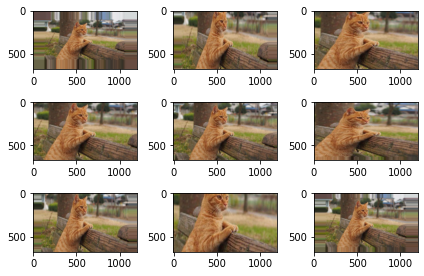

In [6]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The clockwise image is randomly rotated a certain number of degrees from 0 to 360. You are likely to rotate pixels outside the image frame and leave areas of the frame without pixel data, which need to be completed.

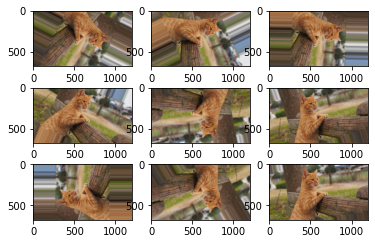

In [7]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the accuracy of the work.


              featurewise_center: Boolean, set the mean of each element to zero of all data.
              samplewise_center**: Boolean, to set the mean of each sample to zero
              featurewise_std_normalization:Boolean, Divide the entries by the standard deviation (std.) Of the data set, based on characteristics.
              samplewise_std_normalization: Boolean, divide each data by its std.
              zca_epsilon: The default is 1e-6.
              zca_whitening: Boolean, indicates if bleaching is applied ZCA.      

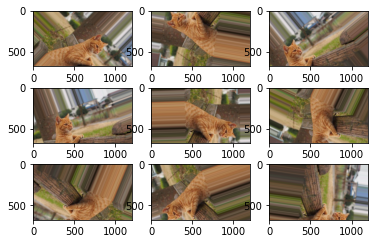

In [8]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [100,150],   
            height_shift_range           = [250,250],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

other programs

Cutting intensity (counterclockwise cutting angle in degrees)

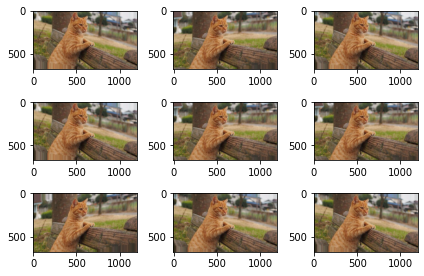

In [9]:
datagen = ImageDataGenerator(shear_range=9.8)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

for whitening a photo with **ZCA**

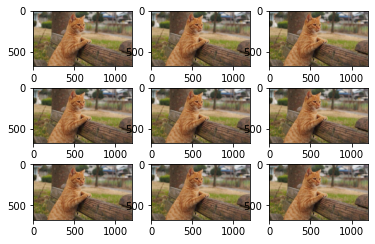

In [10]:
datagen = ImageDataGenerator(zca_epsilon=1e-16)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

 Range for random channel shifts

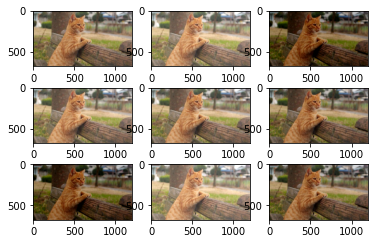

In [ ]:
datagen = ImageDataGenerator(channel_shift_range=50.0)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

 rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided

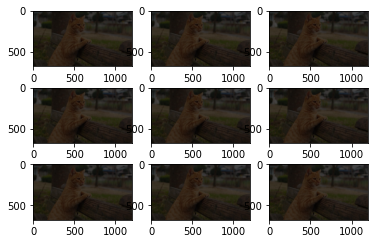

In [13]:
datagen = ImageDataGenerator(rescale=30./100)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of language (we cannot replace each word with its synonym and even if we do, we run the risk that the meaning of prayer will change completely.
There are some libreries that can help us perform this task, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on increasing data.

In [ ]:
!pip install textattack

     |████████████████████████████████| 327kB 7.5MB/s 
     |████████████████████████████████| 153kB 22.1MB/s 
     |████████████████████████████████| 1.1MB 29.1MB/s 
     |████████████████████████████████| 317kB 40.8MB/s 
     |████████████████████████████████| 235kB 51.8MB/s 
     |████████████████████████████████| 686kB 39.2MB/s 
     |████████████████████████████████| 778kB 54.1MB/s 
     |████████████████████████████████| 1.7MB 59.4MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 245kB 59.8MB/s 
     |████████████████████████████████| 3.0MB 69.6MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 245kB 50.9MB/s 
     |████████████████████████████████| 17.3MB 250kB/s 
     |████████████████████████████████| 1.1MB 67.1MB/s 
     |████████████████████████████████| 890kB 63.9MB/s 
     |████████████████████████████████| 204kB 63.5MB/

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-13 17:48:50 INFO: Downloading default packages for language: en (English)...
2020-10-13 17:50:33 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Increase text by replacing it with WordNet thesaurus synonyms.

WordNet is a lexical database of English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus, as it groups words according to their meaning.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on life and say, I wish I had, or I’m gladiola I did?']


## EmbeddingAugmenter
 Increases text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:15<00:00, 32.0MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp54hq2w1a.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Will you look back on life and say, I wish I had, or I’m delighted I did?']

## CharSwapAugmenter
Increases text by replacing, deleting, inserting, and exchanging adjacent characters.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['dill you look back on life and say, I wish I had, or I’m glad I did?']


## EasyDataAugmenter
This augments text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All of these 4 features happen randomly. Then we'll get different results every time we run the code. This returns 4 increased results, unlike the other methods.

In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you did back on life and say, I wish I had, or I’m glad I look?',
 'Will you look backbone on life and say, I wish I had, or I’m glad I did?',
 'Will you look back on life and, I wish I had, or I’m glad I did?',
 'Will you look beaming back on life and say, I wish I had, or I’m glad I did?']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the **translate()** method are:



1.   **src**: source language. this parameter is optional as **googletrans** will detect it.
2.   **dest**: target language. Required parameter.

1.   **text**: the text to be translated from the source language to the target language. Required parameter.




 



When using this method what happens is a retraction, we move from the original language to a destination language and then return to the original, during this retrotraduction, there is a slight change in the sentence between the original text and the back-translated text, but the general meaning of the sentence is still preserved.

Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

For best results it is recommended to do some tests with languages, if the target language is very similar the translation does not lose information, however you may have the problem that the translation is too literal, this becomes a bit of a test and error problem.


Some examples of languages:


*  Afrikaans 'af'

* Chinese (Simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ja'
* Latin 'la'

* Spanish 'es'

* Turkmen 'tk'

* Yiddish 'yi'

* Zulu 'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 972kB 30.9MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=4fe4a6bba2ee240c21abe29373da082fb151bfbcf10580fcbd7a225ec764e7f9
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=404f5d7dec3af8c9d76b873b223687cddfd535232646100b0c1c382364618149
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If you did not succeed at first, try again.


In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
最初はうまくいかない場合は、もう一度やり直してください。
If it doesn't work at first, try again.


In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If you did not succeed at first, try again.
